Purpose:
Testing significant difference in nutrients content in grevillea area(Using one way ANOVA because i am comparing one IV with the DV )
Date: April 18,2019
Edited: April 23,2019
By: Lucy Njoki

In [1]:
rm(list=ls())

In [ ]:
#loading the required packages
library("mvtnorm")
library("survival")
library("MASS")
library("multcomp")
library("TH.data")
library("abind")
library("ggpubr")
library("ggplot2")
library("magrittr")


In [2]:
#setting up the working directory
setwd("D:\\NJUKI\\Community Ecology Analysis\\Clean Data")

In [3]:
#importing datasets
grevillia_data<-read.table("D:\\NJUKI\\Community Ecology Analysis\\Clean Data\\grevillia_plantation.txt",sep = "",header = TRUE)
grevillia_data

soil_category,N,Na,K,P,organic_carbon,moisture
A,0.280,0.609,2.308,24.3,2.989,13.77
A,0.406,0.900,2.385,33.3,2.917,15.32
A,0.406,0.900,1.949,28.4,3.026,13.48
B,0.546,0.696,2.462,29.3,4.058,13.84
B,0.350,0.609,2.308,27.5,3.986,18.18
B,0.448,0.783,1.846,29.3,4.312,15.03
C,0.420,0.522,2.154,27.0,3.062,13.23
C,0.406,0.696,2.154,24.9,3.116,15.24
C,0.448,0.957,1.744,45.8,3.949,13.99
D,0.476,0.696,2.154,25.9,3.442,13.41


In [4]:
str(grevillia_data)

'data.frame':	12 obs. of  7 variables:
 $ soil_category : Factor w/ 4 levels "A","B","C","D": 1 1 1 2 2 2 3 3 3 4 ...
 $ N             : num  0.28 0.406 0.406 0.546 0.35 0.448 0.42 0.406 0.448 0.476 ...
 $ Na            : num  0.609 0.9 0.9 0.696 0.609 0.783 0.522 0.696 0.957 0.696 ...
 $ K             : num  2.31 2.38 1.95 2.46 2.31 ...
 $ P             : num  24.3 33.3 28.4 29.3 27.5 29.3 27 24.9 45.8 25.9 ...
 $ organic_carbon: num  2.99 2.92 3.03 4.06 3.99 ...
 $ moisture      : num  13.8 15.3 13.5 13.8 18.2 ...


In [5]:
attach(grevillia_data)

In [6]:
#variables names
colnames(grevillia_data)

[1] "soil_category"  "N"              "Na"             "K"             
[5] "P"              "organic_carbon" "moisture"

In [7]:
#summary
summary(grevillia_data)

 soil_category       N                Na               K        
 A:3           Min.   :0.2800   Min.   :0.5220   Min.   :1.744  
 B:3           1st Qu.:0.4060   1st Qu.:0.6743   1st Qu.:1.936  
 C:3           Median :0.4340   Median :0.7395   Median :2.154  
 D:3           Mean   :0.4352   Mean   :0.7688   Mean   :2.141  
               3rd Qu.:0.4655   3rd Qu.:0.9000   3rd Qu.:2.314  
               Max.   :0.5740   Max.   :0.9570   Max.   :2.462  
       P         organic_carbon     moisture    
 Min.   :23.20   Min.   :2.917   Min.   :13.23  
 1st Qu.:25.65   1st Qu.:3.026   1st Qu.:13.70  
 Median :27.95   Median :3.279   Median :14.51  
 Mean   :30.00   Mean   :3.454   Mean   :15.05  
 3rd Qu.:30.30   3rd Qu.:3.958   3rd Qu.:15.26  
 Max.   :45.80   Max.   :4.312   Max.   :20.15  

In [8]:
#normality test
shapiro.test(N)
shapiro.test(Na)
shapiro.test(K)
shapiro.test(P)
shapiro.test(organic_carbon)
shapiro.test(moisture)



	Shapiro-Wilk normality test

data:  N
W = 0.95962, p-value = 0.7784



	Shapiro-Wilk normality test

data:  Na
W = 0.90436, p-value = 0.1805



	Shapiro-Wilk normality test

data:  K
W = 0.93216, p-value = 0.4036



	Shapiro-Wilk normality test

data:  P
W = 0.81835, p-value = 0.01526



	Shapiro-Wilk normality test

data:  organic_carbon
W = 0.86129, p-value = 0.05074



	Shapiro-Wilk normality test

data:  moisture
W = 0.78594, p-value = 0.006512


Loading required package: ggplot2
Loading required package: magrittr


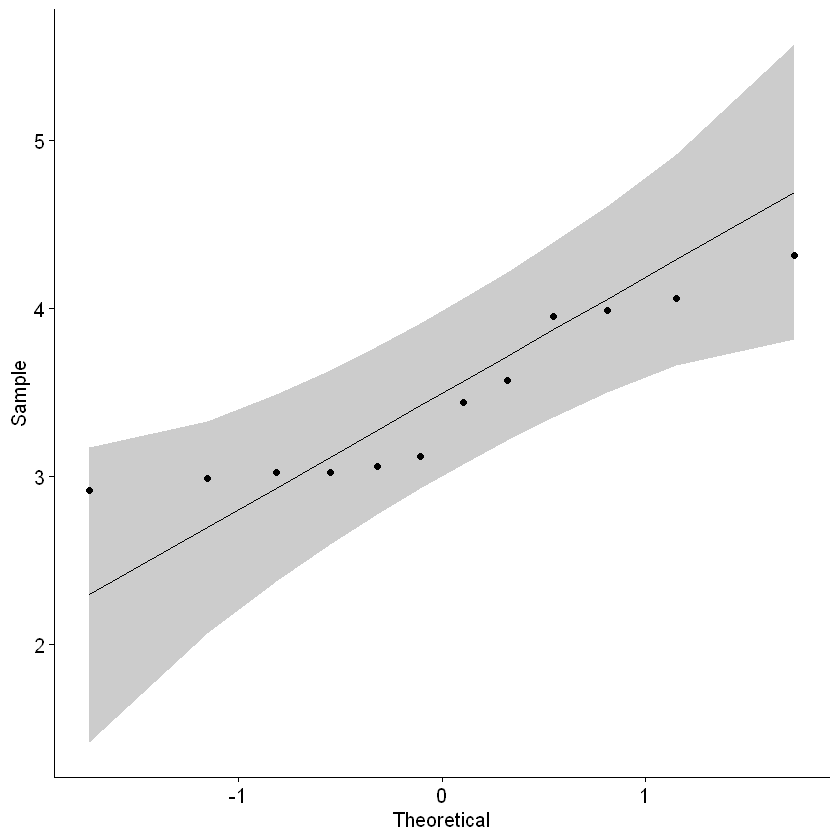

In [9]:
library("ggpubr")
library("ggplot2")
library("magrittr")
ggqqplot(organic_carbon)


In [10]:
#transforming the nonnormal variables
#natural transformation
P_log<-log(P)
P_log


[1] 3.190476 3.505557 3.346389 3.377588 3.314186 3.377588 3.295837 3.214868
 [9] 3.824284 3.254243 3.144152 3.716008

In [11]:
#arcsine transformation
moist<- asin(moisture/100)
moist

moist1<- asin(moisture/100) * 2/pi
moist1


[1] 0.1381389 0.1538057 0.1352116 0.1388457 0.1828166 0.1508717 0.1326890
 [8] 0.1529962 0.1403604 0.1345052 0.2028891 0.1507706

[1] 0.08794197 0.09791575 0.08607839 0.08839191 0.11638469 0.09604792
 [7] 0.08447245 0.09740040 0.08935622 0.08562867 0.12916321 0.09598352

In [12]:
shapiro.test(P_log )
shapiro.test(moist)
shapiro.test(moist1)



	Shapiro-Wilk normality test

data:  P_log
W = 0.87478, p-value = 0.07518



	Shapiro-Wilk normality test

data:  moist
W = 0.785, p-value = 0.006358



	Shapiro-Wilk normality test

data:  moist1
W = 0.785, p-value = 0.006358


In [13]:
#Testing significant difference in nutrients content between the two growing areas
#Grevillia plantation
model0<-aov(K ~ soil_category,data = grevillia_data)
model0

summary(model0)

Call:
   aov(formula = K ~ soil_category, data = grevillia_data)

Terms:
                soil_category Residuals
Sum of Squares      0.0747903 0.5219693
Deg. of Freedom             3         8

Residual standard error: 0.2554333
Estimated effects may be unbalanced

              Df Sum Sq Mean Sq F value Pr(>F)
soil_category  3 0.0748 0.02493   0.382  0.769
Residuals      8 0.5220 0.06525               

In [14]:
model1<-aov(N ~ soil_category,data = grevillia_data)
model1

summary(model1)

Call:
   aov(formula = N ~ soil_category, data = grevillia_data)

Terms:
                soil_category  Residuals
Sum of Squares     0.03023300 0.03815467
Deg. of Freedom             3          8

Residual standard error: 0.06906036
Estimated effects may be unbalanced

              Df  Sum Sq  Mean Sq F value Pr(>F)
soil_category  3 0.03023 0.010078   2.113  0.177
Residuals      8 0.03815 0.004769               

In [15]:
model2<-aov(Na ~ soil_category,data = grevillia_data)
model2

summary(model2)

Call:
   aov(formula = Na ~ soil_category, data = grevillia_data)

Terms:
                soil_category  Residuals
Sum of Squares     0.04543425 0.20512800
Deg. of Freedom             3          8

Residual standard error: 0.1601281
Estimated effects may be unbalanced

              Df  Sum Sq Mean Sq F value Pr(>F)
soil_category  3 0.04543 0.01515   0.591  0.638
Residuals      8 0.20513 0.02564               

In [16]:
model3<-aov(P_log ~ soil_category,data = grevillia_data)
model3

summary(model3)

Call:
   aov(formula = P_log ~ soil_category, data = grevillia_data)

Terms:
                soil_category Residuals
Sum of Squares      0.0177289 0.4555086
Deg. of Freedom             3         8

Residual standard error: 0.238618
Estimated effects may be unbalanced

              Df Sum Sq Mean Sq F value Pr(>F)
soil_category  3 0.0177 0.00591   0.104  0.956
Residuals      8 0.4555 0.05694               

In [17]:
model4<-aov(organic_carbon ~ soil_category,data = grevillia_data)
model4

summary(model4)

Call:
   aov(formula = organic_carbon ~ soil_category, data = grevillia_data)

Terms:
                soil_category Residuals
Sum of Squares      2.0605940 0.7206727
Deg. of Freedom             3         8

Residual standard error: 0.3001401
Estimated effects may be unbalanced

              Df Sum Sq Mean Sq F value  Pr(>F)   
soil_category  3 2.0606  0.6869   7.625 0.00987 **
Residuals      8 0.7207  0.0901                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [18]:
#post hoc tukey test
TukeyHSD(model4)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = organic_carbon ~ soil_category, data = grevillia_data)

$soil_category
          diff        lwr        upr     p adj
B-A  1.1413333  0.3565542 1.92611251 0.0070749
C-A  0.3983333 -0.3864458 1.18311251 0.4176870
D-A  0.3683333 -0.4164458 1.15311251 0.4784995
C-B -0.7430000 -1.5277792 0.04177918 0.0635864
D-B -0.7730000 -1.5577792 0.01177918 0.0535009
D-C -0.0300000 -0.8147792 0.75477918 0.9992870


In [21]:
##How do the soils' moisture content manifest in Eucalyptus plantation
#t test
model<-aov(moist ~ soil_category, data = grevillia_data)
model

summary(model)

Call:
   aov(formula = moist ~ soil_category, data = grevillia_data)

Terms:
                soil_category   Residuals
Sum of Squares    0.001003894 0.003995486
Deg. of Freedom             3           8

Residual standard error: 0.02234806
Estimated effects may be unbalanced

              Df   Sum Sq   Mean Sq F value Pr(>F)
soil_category  3 0.001004 0.0003346    0.67  0.594
Residuals      8 0.003995 0.0004994               